# Airbnb Listings Data Analysis

This notebook performs exploratory data analysis on Airbnb listing data for Albany, New York, United States 05 October, 2025 to uncover insights about pricing, availability, room types, and host patterns.

## Import required libraries

pandas will be used for data manipulation, seaborn and matplotlib for visualization.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Data Ingestion
Loading the Airbnb listings dataset and displaying the first few rows to understand the structure.

In [2]:
data_source = "https://data.insideairbnb.com/united-states/ny/albany/2025-09-06/visualisations/listings.csv"
# Read data from source into dataframe df
df = pd.read_csv(data_source)
# Confirm data load 
df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2992450,Luxury 2 bedroom apartment,4621559,Kenneth,NaN,THIRD WARD,42.65789,-73.75370,Entire home/apt,70.0,28,9,2022-08-17,0.07,1,159,0,NaN
1,3820211,Funky Urban Gem: Prime Central Location - Park...,19648678,Terra,NaN,SIXTH WARD,42.65222,-73.76724,Entire home/apt,104.0,2,311,2025-08-04,2.31,5,339,6,NaN


### Data Dictionary
**id**: Airbnb's unique identifier for the listing  
**name**: Name of the listing  
**host_name**: Name of the host. Usually just the first name(s).  
**neighbourhood_group**:  
**neighbourhood**:  
**latitude**: Uses the World Geodetic System (WGS84) projection for latitude and longitude.  
**longitude**: Uses the World Geodetic System (WGS84) projection for latitude and longitude.  
**room_typee**: "[Entire home/apt|Private room|Shared room|Hotel]

All homes are grouped into the following three room types:

Entire place
Private room
Shared room
Entire place

**price**: daily price in local currency.  
**maximun_nights**: maximum number of night stay for the listing (calendar rules may be different)  
**number_of_reviews**: The number of reviews the listing has  
**last_review**: The date of the last/newest review  
**reviews_per_month**: "The average number of reviews per month the listing has over the lifetime of the listing.  
**calculated_host_listings_count**: The number of listings the host has in the current scrape, in the city/region geography.  
**availability_365**: avaliability_x. The availability of the listing x days in the future as determined by the calendar. Note a listing may not be available because it has been booked by a guest or blocked by the host.  
**number_of_reviews_ltm**: The number of reviews the listing has (in the last 12 months)  
**license**: The licence/permit/registration number

## Data Exploration
In this section, the data is explored; understanding of the structure and column information, checks for duplicate records, missing values, anomalies in the datatype, and pattern identification.

In [3]:
# Get overview of the data structure:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465 entries, 0 to 464
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              465 non-null    int64  
 1   name                            465 non-null    object 
 2   host_id                         465 non-null    int64  
 3   host_name                       465 non-null    object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   465 non-null    object 
 6   latitude                        465 non-null    float64
 7   longitude                       465 non-null    float64
 8   room_type                       465 non-null    object 
 9   price                           425 non-null    float64
 10  minimum_nights                  465 non-null    int64  
 11  number_of_reviews               465 non-null    int64  
 12  last_review                     404 

In [4]:
# Get summary stats
df.describe(include='all')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
count,4.650000e+02,465,4.650000e+02,465,0.0,465,465.000000,465.000000,465,425.000000,465.000000,465.000000,404,404.000000,465.000000,465.000000,465.000000,0.0
unique,NaN,463,NaN,168,NaN,15,NaN,NaN,2,NaN,NaN,NaN,144,NaN,NaN,NaN,NaN,NaN
top,NaN,Funky Urban Gem: Prime Central Location - Park...,NaN,Diana,NaN,SIXTH WARD,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2025-08-03,NaN,NaN,NaN,NaN,NaN
freq,NaN,3,NaN,24,NaN,101,NaN,NaN,341,NaN,NaN,NaN,18,NaN,NaN,NaN,NaN,NaN
mean,8.231363e+17,NaN,2.602113e+08,NaN,NaN,NaN,42.659214,-73.776541,NaN,111.378824,7.075269,58.827957,NaN,2.014257,7.266667,238.812903,14.172043,NaN
std,5.437113e+17,NaN,2.045279e+08,NaN,NaN,NaN,0.010374,0.018236,NaN,112.311477,22.167873,109.927859,NaN,1.959655,6.996140,121.694313,20.280800,NaN
min,2.992450e+06,NaN,6.576000e+04,NaN,NaN,NaN,42.630660,-73.876490,NaN,24.000000,1.000000,0.000000,NaN,0.030000,1.000000,0.000000,0.000000,NaN
25%,5.412642e+07,NaN,5.105098e+07,NaN,NaN,NaN,42.652690,-73.787714,NaN,65.000000,1.000000,3.000000,NaN,0.570000,2.000000,138.000000,1.000000,NaN
50%,9.506135e+17,NaN,2.329679e+08,NaN,NaN,NaN,42.658240,-73.774400,NaN,91.000000,2.000000,19.000000,NaN,1.395000,4.000000,270.000000,6.000000,NaN
75%,1.288604e+18,NaN,4.441635e+08,NaN,NaN,NaN,42.665984,-73.763670,NaN,116.000000,3.000000,67.000000,NaN,2.922500,12.000000,351.000000,20.000000,NaN


### Check for duplicate values

In [5]:
# Check for duplicate records
duplicate_records = df.duplicated().sum()
print(f"There are {duplicate_records} duplicate records")

There are 0 duplicate records


#### Check for missing values
Identifying columns with missing data

In [6]:
# Check for missing values 
missing_value = df.isna().sum()
missing_value = missing_value[missing_value > 0]

# Print the column and total missing values for each.
if len(missing_value) > 0:
    print("Columns with missing values:")
    for col, count in missing_value.items():
        print(f"  {col}: {count} missing")

Columns with missing values:
  neighbourhood_group: 465 missing
  price: 40 missing
  last_review: 61 missing
  reviews_per_month: 61 missing
  license: 465 missing


In [7]:
# Check percentage of missing values per column.
for col in df.columns:
    missing_percentage = df[col].isna().mean() * 100
    if missing_percentage > 0:
        print(f"{col}: {missing_percentage:.2f}%")

neighbourhood_group: 100.00%
price: 8.60%
last_review: 13.12%
reviews_per_month: 13.12%
license: 100.00%


#### Data overview
Retrieve columns, datatypes and values to check for correct datatype

In [8]:
# Print out columns, their datatypes and first values to check for correctness of datatype.
for col in df.columns:
    data_type = df[col].dtype
    record = df[col].dropna().iloc[0] if not df[col].dropna().empty else "N/A"
    print(f"{col:35} {str(data_type):15} {record}")

id                                  int64           2992450
name                                object          Luxury 2 bedroom apartment
host_id                             int64           4621559
host_name                           object          Kenneth
neighbourhood_group                 float64         N/A
neighbourhood                       object          THIRD WARD
latitude                            float64         42.65789
longitude                           float64         -73.7537
room_type                           object          Entire home/apt
price                               float64         70.0
minimum_nights                      int64           28
number_of_reviews                   int64           9
last_review                         object          2022-08-17
reviews_per_month                   float64         0.07
calculated_host_listings_count      int64           1
availability_365                    int64           159
number_of_reviews_ltm               

Identifying listings with no reviews

In [9]:
# Check records where number_of_reviews = 0
selected_data = df.loc[df['number_of_reviews'] == 0]
selected_data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
60,42567833,Homey,339085327,Arkady,NaN,NINTH WARD,42.655670,-73.785400,Entire home/apt,160.0,70,0,NaN,NaN,1,365,0,NaN
115,54097694,B Unieke,438504176,Roland,NaN,SECOND WARD,42.646830,-73.756620,Entire home/apt,NaN,1,0,NaN,NaN,1,0,0,NaN
131,628824127129967353,Clean lines and accessible Convenient Location!,7164949,Jordan,NaN,THIRD WARD,42.661700,-73.764668,Private room,63.0,3,0,NaN,NaN,1,88,0,NaN
186,823275570359807298,Cozy Home 5 Minute Walk to Albany Medical Center,500360485,Manjano,NaN,SIXTH WARD,42.651840,-73.770740,Entire home/apt,NaN,7,0,NaN,NaN,1,0,0,NaN
205,902326803627859755,"""The LEO Home"" Private Bedroom 4",349460842,Scott,NaN,TENTH WARD,42.661740,-73.783250,Private room,70.0,30,0,NaN,NaN,17,309,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,1481862654824444067,Elegant Albany room with Breakfast Next Downtown,466790114,Zohar,NaN,ELEVENTH WARD,42.678080,-73.782080,Entire home/apt,45.0,1,0,NaN,NaN,22,365,0,NaN
455,1481865863422349835,Albany Lovely room Next to Downtown W/Breakfast,466790114,Zohar,NaN,FIFTH WARD,42.675802,-73.780369,Entire home/apt,42.0,1,0,NaN,NaN,22,363,0,NaN
459,1485723149961736573,Albany Lovely room with Breakfast Next to Down...,466790114,Zohar,NaN,ELEVENTH WARD,42.682050,-73.784600,Entire home/apt,39.0,1,0,NaN,NaN,22,365,0,NaN
462,1498161268794053659,Apartment in Albany,111760206,Rachel,NaN,SIXTH WARD,42.653340,-73.766050,Entire home/apt,59.0,1,0,NaN,NaN,1,340,0,NaN


### Confirming patterns
From above it can be seen that Null records in last_review and reviews _per_month are present where number_of_reviews is 0

In [10]:
# Confirm values are Null in last_reivew and reviews_per_month where number_of_reviews is 0
filtered_data = df.loc[(df['number_of_reviews'] == 0) & (df['last_review'].isna()) & (df['reviews_per_month'].isna())]
print(filtered_data[['number_of_reviews', 'last_review', 'reviews_per_month']])

     number_of_reviews last_review  reviews_per_month
60                   0         NaN                NaN
115                  0         NaN                NaN
131                  0         NaN                NaN
186                  0         NaN                NaN
205                  0         NaN                NaN
..                 ...         ...                ...
454                  0         NaN                NaN
455                  0         NaN                NaN
459                  0         NaN                NaN
462                  0         NaN                NaN
464                  0         NaN                NaN

[61 rows x 3 columns]


In [11]:
# Check for listings with zero availability
available = df[df['availability_365'] == 0]
print(f" there are {len(available)} records with no availbility")

 there are 19 records with no availbility


### Summary from data exploration
From exploration of the data, the following were observed
- There are no duplicate values.
- neighbourhood_group and license have total entries as Null values.
- last_review is a date entry but the current datatype is object.
- There are Null values for last_review, number_of_reviews and reviews_per_month.
- neighbourhood values are in UPPER CASE.
- last_review and reviews_per_month are dependent on number_of_reviews, meaning the Null values present in last_review and reviews_per_month are present because those listings did not receive any reviews at all. ie where number_of_reviews = 0, last_review and reviews_per_month is Null .
- There are 19 listings with zero availability.

## Data Cleaning
Performing data cleaning to treat observations from exploration identified in summary

In [12]:
# Standardise columns to remove any leading or trailing space
df.columns = df.columns.str.strip()

In [13]:
# Convert datatype of last review to datetime64
df['last_review'] = pd.to_datetime(df['last_review'], format='%Y-%m-%d', errors='coerce')

# Verify the conversion
print(df['last_review'].dtype) 

datetime64[ns]


In [14]:
# Change values for 'neighbourhood' from upper to title case
df['neighbourhood'] = df['neighbourhood'].str.title()

df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2992450,Luxury 2 bedroom apartment,4621559,Kenneth,NaN,Third Ward,42.65789,-73.75370,Entire home/apt,70.0,28,9,2022-08-17,0.07,1,159,0,NaN
1,3820211,Funky Urban Gem: Prime Central Location - Park...,19648678,Terra,NaN,Sixth Ward,42.65222,-73.76724,Entire home/apt,104.0,2,311,2025-08-04,2.31,5,339,6,NaN
2,5651579,Large studio apt by Capital Center & ESP@,29288920,Gregg,NaN,Second Ward,42.64615,-73.75966,Entire home/apt,75.0,2,372,2025-08-04,2.96,2,16,6,NaN


In [15]:
# Drop empty columns
df.drop(['neighbourhood_group', 'license'], axis=1, inplace=True)

# Confirm columns dropped
df.columns


Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm'],
      dtype='object')

### Handling NULL values
* Keep NaT for last_review as indeed it's true there's no last review and it's not missing.
* Fill NaN with 0 in reviews_per_month.
* Drop Null values in price.




In [16]:
# Fill NaN in reviews_per_month with 0 where number_of_reviews is 0
df.loc[df['number_of_reviews'] == 0, 'reviews_per_month'] = 0

# Verify
check = df[df['number_of_reviews'] == 0]['reviews_per_month'].isna().sum()
print(f"Remaining NaN values: {check}")

Remaining NaN values: 0


In [17]:
# Ensure last_review is NaT
df.loc[df['number_of_reviews'] == 0, 'last_review'] = pd.NaT

In [18]:
# Drop rows with missing values in price
df.dropna(subset=['price'], inplace=True)

Dropping unnecessary records, like listings with zero availability


In [19]:
df = df[df['availability_365'] != 0].reset_index(drop=True)

## Data Enrichment
Enriching the dataset by adding new columns based off grouping on certain factors.

In [20]:
# Create a price_per_booking column using price and minimum_nights. 
df['price_per_booking'] = df['price'] * df['minimum_nights']

Creating an availability category to group listings based off their total number of available days

In [21]:
'''
Bucket availability into categories:
Full-time (availability > 300)
Part-time (100–300)
Rare (<100)
'''
def categorize(value):
    if value > 500:
        return 'Full time'
    elif value > 100:
        return 'Part time'
    else:
        return 'Rare'

df['availability_category'] = df['availability_365'].apply(categorize)

Confirm columns created

In [22]:
df.head(2)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,price_per_booking,availability_category
0,2992450,Luxury 2 bedroom apartment,4621559,Kenneth,Third Ward,42.65789,-73.75370,Entire home/apt,70.0,28,9,2022-08-17,0.07,1,159,0,1960.0,Part time
1,3820211,Funky Urban Gem: Prime Central Location - Park...,19648678,Terra,Sixth Ward,42.65222,-73.76724,Entire home/apt,104.0,2,311,2025-08-04,2.31,5,339,6,208.0,Part time


In [23]:
df.groupby('availability_category')['id'].count()

availability_category
Part time    354
Rare          71
Name: id, dtype: int64

# Data Analysis

##### 1. What are the top 10 most expensive neighborhoods by average price?

In [24]:
expensive_neighbourhoods = df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).head(10)

expensive_neighbourhoods

neighbourhood
Fifteenth Ward     223.642857
Eighth Ward        158.125000
Fourteenth Ward    152.692308
First Ward         142.333333
Twelfth Ward       131.500000
Second Ward        128.936170
Tenth Ward         111.280000
Ninth Ward         110.406250
Thirteenth Ward    109.404762
Fourth Ward        108.769231
Name: price, dtype: float64

##### 2. What’s the average availability and price by room type?

In [25]:
average_availability = df.groupby('room_type').agg({
    'price': 'mean',
    'availability_365': 'mean'
}).round(2)

average_availability.columns = ['avg_price', 'avg_availability']

average_availability.head()

,avg_price,avg_availability
room_type,,
Entire home/apt,127.45,255.98
Private room,67.02,236.32


##### 3. Which host has the most listings?

In [26]:
top_host = df.groupby('host_name')['id'].count().sort_values(ascending=False).head(1)

print(f"The host with the most listings is {top_host.index[0]} with {top_host.values[0]} listings.")

The host with the most listings is Zohar with 22 listings.


##### 4. How does average price vary across different boroughs or districts?

In [27]:
avg_price = df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)
avg_price

neighbourhood
Fifteenth Ward     223.642857
Eighth Ward        158.125000
Fourteenth Ward    152.692308
First Ward         142.333333
Twelfth Ward       131.500000
Second Ward        128.936170
Tenth Ward         111.280000
Ninth Ward         110.406250
Thirteenth Ward    109.404762
Fourth Ward        108.769231
Seventh Ward       107.666667
Sixth Ward         101.978261
Third Ward          84.757576
Fifth Ward          66.166667
Eleventh Ward       62.928571
Name: price, dtype: float64

/var/folders/9j/479_31kj4v978nsc4lpwpkg80000gp/T/ipykernel_13276/1641177974.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_price_df, y='neighbourhood', x='price', palette='viridis')


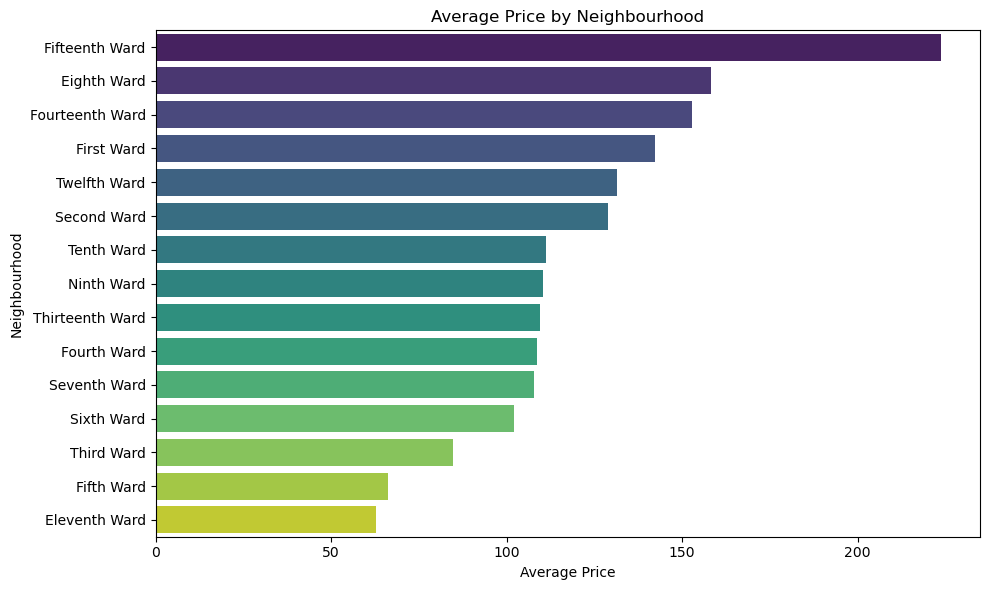

In [28]:
avg_price_df = avg_price.reset_index()

# Seaborn bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_price_df, y='neighbourhood', x='price', palette='viridis')
plt.xlabel('Average Price')
plt.ylabel('Neighbourhood')
plt.title('Average Price by Neighbourhood')
plt.tight_layout()
plt.show()

##### 5. How many listings have never been reviewed?

In [29]:
zero_reviews = (df['number_of_reviews'] == 0 ).sum()
print(f"There are {zero_reviews} listings that have not been reviewed")

There are 49 listings that have not been reviewed


##### 6. Write a summary of 3–5 key insights you found through your analysis

The neighbourhood with the highest